In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-c/student_resource 3/README.md
/kaggle/input/amazon-c/student_resource 3/sample_code.py
/kaggle/input/amazon-c/student_resource 3/dataset/sample_test.csv
/kaggle/input/amazon-c/student_resource 3/dataset/sample_test_out_fail.csv
/kaggle/input/amazon-c/student_resource 3/dataset/sample_test_out.csv
/kaggle/input/amazon-c/student_resource 3/dataset/train.csv
/kaggle/input/amazon-c/student_resource 3/dataset/test.csv
/kaggle/input/amazon-c/student_resource 3/src/sanity.py
/kaggle/input/amazon-c/student_resource 3/src/constants.py
/kaggle/input/amazon-c/student_resource 3/src/test.ipynb
/kaggle/input/amazon-c/student_resource 3/src/utils.py


In [1]:
from huggingface_hub import login
login()

In [2]:
import requests

from io import BytesIO

from PIL import Image

response = requests.get('https://m.media-amazon.com/images/I/61oMj2iXOuL.jpg', stream=True) 

image_data = BytesIO(response.content)

In [100]:
image = Image.open(image_data)

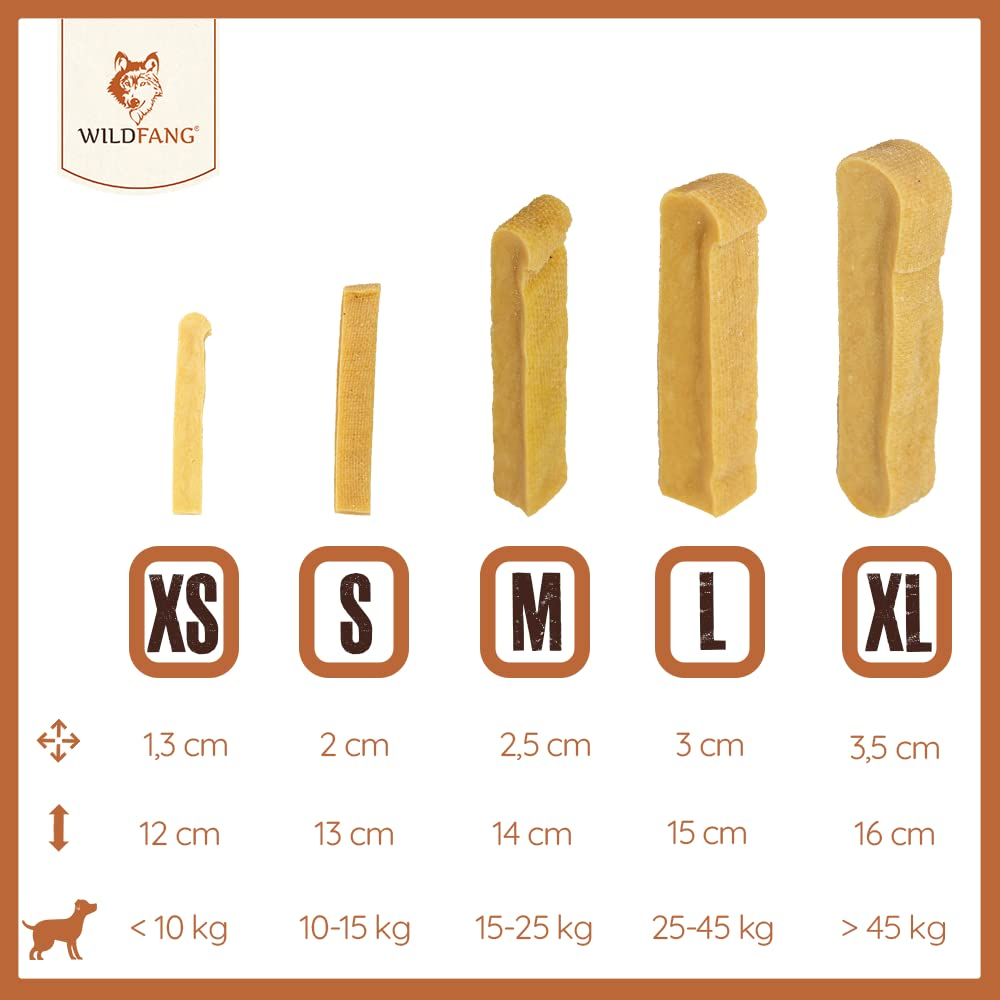

In [86]:
image

In [29]:
import torchvision.transforms as transforms

def transform_(im_d):
    
    transforms_ = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224 pixels
  transforms.ToTensor() , # Convert image to tensor and scale to [0, 1]
   #  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])
    return transforms_(im_d)

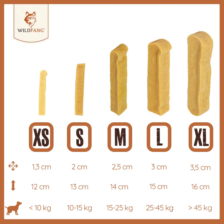

In [102]:
## testing the blurring of image
transform_(image)

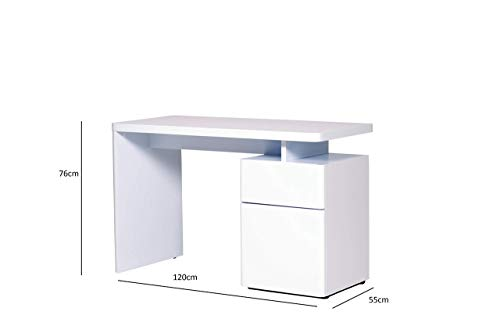

In [109]:
# test imag
x = pd.read_csv(r'/kaggle/input/amazon-c/student_resource 3/dataset/test.csv')

response = requests.get(x['image_link'][20], stream=True) 

image_data = BytesIO(response.content)
Image.open(image_data)

In [4]:
from PIL import Image
from io import BytesIO
import requests

def retrive_image(url):

    response = requests.get(url, stream=True)

# Check for successful download

    if response.status_code == 200:
        
    # Create an in-memory file-like object
    
        image_data = BytesIO(response.content)

    # Open the image from the in-memory data
        image = Image.open(image_data)
        
     #   print(image)
        
        if image.mode != "RGB":
            image = image.convert("RGB")
            print("..")
            
       
        return image

    

    else:
        
        print(f"Error downloading image: {response.status_code}")
        
    return None

In [92]:
!pip install torch_xla

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 MB 15.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.141.0
    Uninstalling google-api-python-client-2.141.0:
      Successfully uninstalled google-api-python-client-2.141.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.417 requires google-api-python-client>=1.12.1, but you have google-api-python-client 1.8.0 which is incompatible.
kfp 2.5.0 requires goo

In [93]:
import torch
import torch_xla.core.xla_model as xm
import torch_xla.distributed.xla_multiprocessing as xmp
import torch_xla.utils.utils as xu

/opt/conda/lib/python3.10/site-packages/torch_xla/__init__.py:202: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [5]:

# Initialize TPU device
device = xm.xla_device()



NameError: name 'xm' is not defined

In [7]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  

In [98]:
tpu_enabled = False

if device.type=='xla':
    
    tpu_enabled = True
    
else:
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  

In [8]:
#loading all the pre-tranied models

import torch
import torch.nn as nn
import torch.optim as optim
from transformers import GPT2Tokenizer, GPT2LMHeadModel, ViTModel

vision_e = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k").to(device)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [22]:
# defining own vocabulary
word = ['0','1','2','3','4','5','6','7','8','9', '.','[',']','item_weight',
                    'item_volume', 'voltage', 'wattage','maximum_weight_recommendation',
                    'height', 'width','fluid','foot','gallon','gigabyte','gram','horsepower','hour','inch','kilogram',
 'kilowatt',
 'litre',
 'metre',
 'microgram',
 'milliampere',
 'milligram',
 'millilitre',
 'millimetre',
 'nits',
 'ounce',
 'person',
 'pint',
 'pound',
 'quart',
 'to',
 'ton',
 'volt',
 'watt',   
  'candela',
 'carat',
 'centilitre',
 'centimetre',
 'cubic',
 'cup',
 'decilitre',
 'fluid',
 'foot',
 'gallon',
 'gigabyte',
 'gram',
 'horsepower',
 'hour',
 'inch']
vocab = {
   
    "<unk>": 1,  # Unknown token
    
    
}

v = 2

for i in word:
    
    if i not in vocab.keys():
        
        vocab[i] = v
        
        v += 1



In [9]:
#creating own tokenizer
import json

# Your list of tokens
tokens = ['0','1','2','3','4','5','6','7','8','9', '.','[',']','item_weight',
          'item_volume', 'voltage', 'wattage','maximum_weight_recommendation',
          'height', 'width','fluid','foot','gallon','gigabyte','gram','horsepower','hour','inch','kilogram',
          'kilowatt','litre','metre','microgram','milliampere','milligram','millilitre','millimetre','nits',
          'ounce','person','pint','pound','quart','to','ton','volt','watt','candela','carat','centilitre',
          'centimetre','cubic','cup','decilitre','fluid','foot','gallon','gigabyte','gram','horsepower',
          'hour','inch']

# Create a vocabulary mapping
vocab = {token: idx for idx, token in enumerate(set(tokens))}

# Save vocab.json
with open('./vocab2.json', 'w') as f:
    json.dump(vocab, f, indent=2)

print(f"Vocabulary JSON saved to 'vocab.json'.")


Vocabulary JSON saved to 'vocab.json'.


In [35]:
# corpus = [
#     "] width [",
#     "width",
#     "[ width ]",
#     "item_weight item_volume voltage wattage",
#     "maximum_weight_recommendation height width"
# ]

In [10]:
# know creating the BPE ...
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers, processors

# Create the tokenizer using BPE
tokenizer_ = Tokenizer(models.BPE())

# Use a pre-tokenizer that splits on whitespace
tokenizer_.pre_tokenizer =  pre_tokenizers.ByteLevel()

# Train BPE on your synthetic corpus
trainer = trainers.BpeTrainer(special_tokens=["<unk>", "<|startoftext|>", "<|endoftext|>", "<|pad|>"], vocab_size=100)

tokenizer_.train_from_iterator(tokens, trainer)

# Save vocab and merges
tokenizer_.model.save(".", "bpe")

tokenizer_.save("bpe_tokenizer.json")

In [7]:
!pip install sentencepiece tokenizers


In [11]:
from transformers import GPT2Tokenizer, PreTrainedTokenizerFast

# Load the slow tokenizer
slow_tokenizer = GPT2Tokenizer(
    vocab_file='/kaggle/working/bpe-vocab.json',
    merges_file ='/kaggle/working/bpe-merges.txt',
    unk_token="<unk>",
    bos_token="<|startoftext|>",
    eos_token="<|endoftext|>",
    pad_token="<|pad|>"
)

# Save the slow tokenizer
#slow_tokenizer.save_pretrained("./")

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
len(slow_tokenizer)


100

In [13]:
## let test in a (image, text) pairs
import torch.nn as nn
import torch.optim as optim

vision_e.train()
#text_g.train()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()

In [14]:
## let define the dataset and train_dataloader

import pandas as pd

data_set = pd.read_csv(r'/kaggle/input/amazon-c/student_resource 3/dataset/train.csv')


# Split the dataset into training and testing sets
train_data = data_set.sample(frac=0.7, random_state=42)
test_data = data_set.drop(train_data.index)

# Reindex the dataframes
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)


In [15]:
from torch.utils.data import Dataset, DataLoader

class text_extraction_dataset(Dataset):
    
    def __init__(self, max_length, train_file):
        
        self.max_length = max_length
        
        self.train_file =  train_file
        
    def __len__(self):
        
        return self.max_length
    
    def __getitem__(self, index):
        
        # tokenization_of image
        
        image_path = self.train_file['image_link'][index]
        
        image_tensor = retrive_image(image_path)
        
        transform_image = transform_(image_tensor)
        
        input_text = self.train_file['entity_name'][index]
        
        output_ =self.train_file['entity_value'][index]

        return  {
            "text_input" :   input_text,
            "image_vector":  transform_image,
            "labels" : output_ 
        }

In [16]:
# initializing own dataset from dataloader
# image_embeddings, tokenizer_text, max_length, train_file):
train_data_length = 64*1200
test_data_length = 64*100

train_data_ =text_extraction_dataset(train_data_length,train_file= train_data)
test_data_ = text_extraction_dataset(test_data_length,train_file= test_data)

In [17]:
train_data_[0]

{'text_input': 'item_weight',
 'image_vector': <PIL.Image.Image image mode=RGB size=224x224>,
 'labels': '1.0 kilogram'}

In [14]:
##let check the tokenization
# index =7

# image_path = train_data['image_link'][index]
        
# image_tensor = retrive_image(image_path)




<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1250x1000 at 0x7B87C0E84C40>


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1250x1000 at 0x7A85DBBEE6B0>


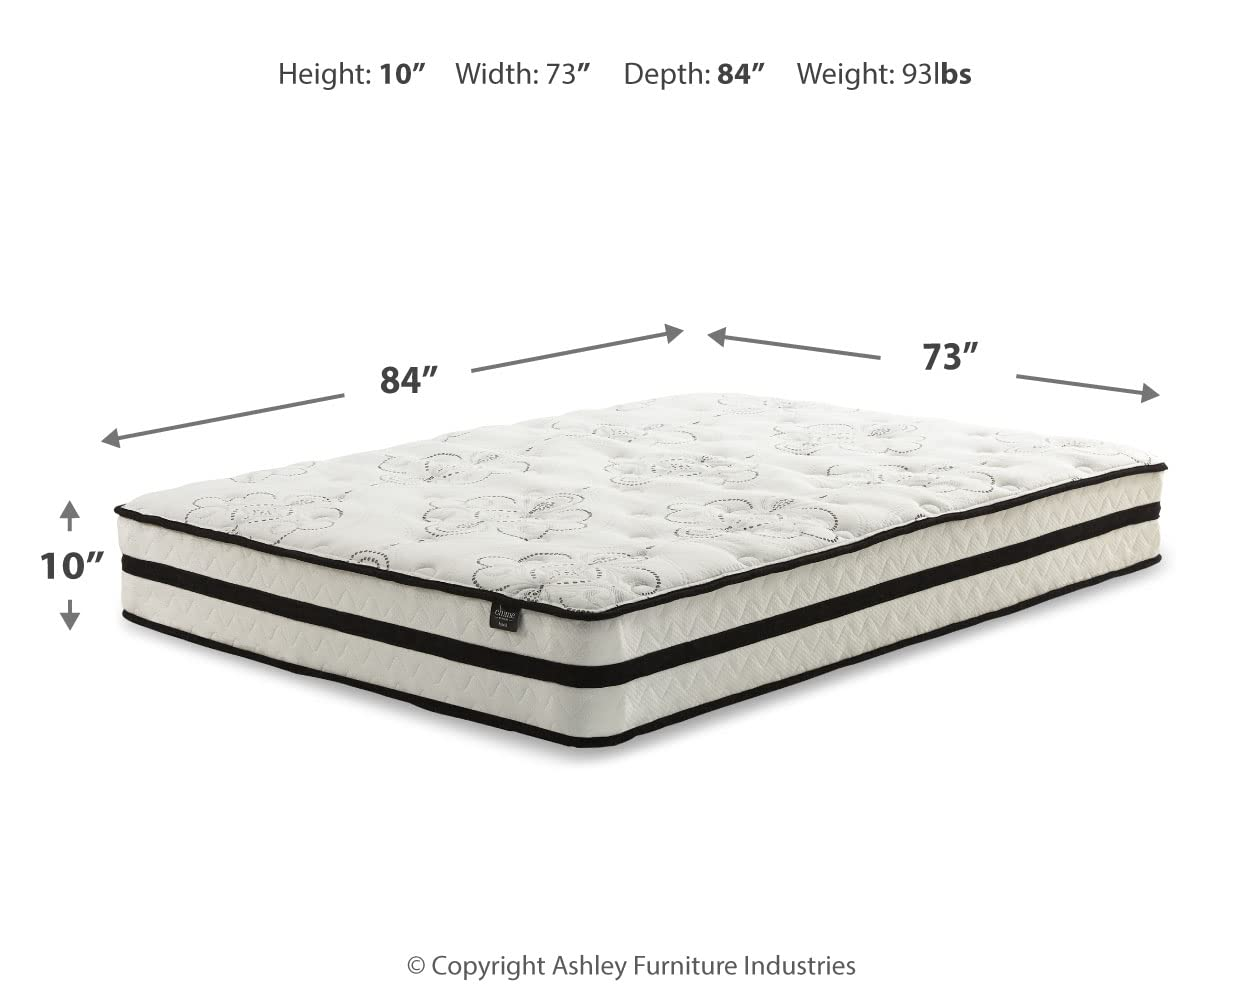

In [55]:
# retrive_image(image_path)

In [15]:
# m = transform_(image_tensor)

In [16]:
# m.shape

torch.Size([3, 224, 224])

In [18]:
from transformers import ViTImageProcessor

In [19]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k', do_rescale=False)



preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [38]:

# outputs = vision_e(**)

# last_hidden_states = outputs.last_hidden_state

NameError: name 'inputs' is not defined

In [77]:
# last_hidden_states.shape

torch.Size([1, 197, 768])

In [55]:
# ## the above process for image
# ## now, for text
# input_text = train_data['entity_name'][index]

In [56]:
# input_text

'width'

In [66]:
# slow_tokenizer('[]',   # Pads to the longest sequence in the batch
#     padding=True,  # Pads to the longest sequence in the batch
#     truncation=True, max_length=20)

{'input_ids': [15, 16], 'attention_mask': [1, 1]}

In [57]:
train_data.head()

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/81nEfmLyyM...,630390,item_weight,1.0 kilogram
1,https://m.media-amazon.com/images/I/51gz4v5BxT...,751532,width,78.0 inch
2,https://m.media-amazon.com/images/I/61D2A-LxNn...,478233,height,10.1 inch
3,https://m.media-amazon.com/images/I/51INxCAF0T...,943839,depth,2.88 inch
4,https://m.media-amazon.com/images/I/81-zmM+W8B...,487566,item_weight,1.8 pound


In [ ]:
# tokenized_inputs = slow_tokenizer(
#     input_texts,
#     return_tensors='pt',
#     padding=True,  # Pads to the longest sequence in the batch
#     truncation=True,
#     max_length=20  # Maximum sequence length
# )

In [69]:
# index = 7
# input_text = train_data['entity_name'][7]
        
# text_input_ids = slow_tokenizer(input_text, return_tensors="pt", padding=True,
#             truncation=True,  max_length=20                 
                               
#                                ).input_ids
        
# output_ids = slow_tokenizer(train_data['entity_value'][7],  return_tensors="pt",
#                  padding=True,
#             truncation=True,  max_length=20            
#                            ).input_ids
#         ## input_text can be the attention also.
        
# with torch.no_grad():
    
#     image_path = train_data['image_link'][index]
        
#     image_tensor = retrive_image(image_path)
    
   
    
#     image_tensor = transform_(image_tensor)
    
#     image_tensor = processor(images=image_tensor, return_tensors="pt")
            
#     image_outputs = vision_e(**image_tensor)
            
#     image_embeddings = image_outputs.last_hidden_state 

   

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1250x1000 at 0x7A85DBCAFF70>


In [70]:
# image_embeddings.shape

torch.Size([1, 197, 768])

In [71]:
# text_input_ids.shape

torch.Size([1, 5])

In [20]:
from transformers import GPT2Config
gpt2_config = GPT2Config.from_pretrained("gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [21]:
gpt2_config.add_cross_attention = True  # Enable cross-attention for GPT-2
text_generator = GPT2LMHeadModel.from_pretrained("gpt2", config=gpt2_config).to(device)

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.crossattention.c_attn.bias', 'h.0.crossattention.c_attn.weight', 'h.0.crossattention.c_proj.bias', 'h.0.crossattention.c_proj.weight', 'h.0.crossattention.q_attn.bias', 'h.0.crossattention.q_attn.weight', 'h.0.ln_cross_attn.bias', 'h.0.ln_cross_attn.weight', 'h.1.crossattention.c_attn.bias', 'h.1.crossattention.c_attn.weight', 'h.1.crossattention.c_proj.bias', 'h.1.crossattention.c_proj.weight', 'h.1.crossattention.q_attn.bias', 'h.1.crossattention.q_attn.weight', 'h.1.ln_cross_attn.bias', 'h.1.ln_cross_attn.weight', 'h.10.crossattention.c_attn.bias', 'h.10.crossattention.c_attn.weight', 'h.10.crossattention.c_proj.bias', 'h.10.crossattention.c_proj.weight', 'h.10.crossattention.q_attn.bias', 'h.10.crossattention.q_attn.weight', 'h.10.ln_cross_attn.bias', 'h.10.ln_cross_attn.weight', 'h.11.crossattention.c_attn.bias', 'h.11.crossattention.c_attn.weight', 'h.11.crossat

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [50]:
#text_generator.resize_token_embeddings(len(slow_tokenizer))

Embedding(100, 768)

In [56]:
# print(output_ids.shape)
# print(text_input_ids.shape)

torch.Size([1, 7])
torch.Size([1, 5])


In [87]:
#outputs = text_generator(input_ids=text_input_ids, encoder_hidden_states=image_embeddings, labels=output_ids)

In [53]:
# # before training
# generated_ids = text_generator.generate(
#     input_ids=text_input_ids,  # Start generation with the start token
#     encoder_hidden_states=image_embeddings,  # Pass image embeddings
#     max_length=10,  # Maximum length of the generated sequence
#     pad_token_id=slow_tokenizer.pad_token_id,  # Handle padding if needed
#     eos_token_id=slow_tokenizer.eos_token_id,  # Stop when end token is generated
#     do_sample=True  # Optional: sampling for diversity
# )

In [58]:
# generated_ids

tensor([[45, 80, 17, 57, 73, 14, 19, 89, 24, 55]])

In [54]:
# generated_text = slow_tokenizer.decode(generated_ids[0], skip_special_tokens=True)
# print(f"Generated Text: {generated_text}")

Generated Text: item_weight9boogme


In [55]:
# #image_embeddings = torch.randn(3, 197, 768)  # Batch of 3 image embeddings
# input_texts = ["[54.4 to 56.7] centimeters"]

# # Tokenize with padding for batching
# tokenized_inputs = slow_tokenizer(
#     input_texts,
#     return_tensors='pt',
#     padding=True,  # Pads to the longest sequence in the batch
#     truncation=True,
#     max_length=20  # Maximum sequence length
# )


In [56]:
# decoded_text = slow_tokenizer.decode(tokenized_inputs.input_ids[0], skip_special_tokens=True)
# print("Decoded text:", decoded_text)

Decoded text: [54.4 to 56.7] centimeters


In [22]:
# dataloader
train_dataloader = DataLoader(train_data_, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data_, batch_size=64, shuffle=True)

In [79]:
# for batch in train_dataloader:
    
#     text_input = batch['text_input']  # Ground truth text labels (e.g., '52.3 inches')
        
#     labels =batch['labels']
    
#     print(len(text_input+labels))
#     print(labels[0])
#     print(text_input[0])
#     print((text_input+labels)[0])
#     print((text_input+labels)[64])
#     break

..
128
71.0 centimetre
height
height
71.0 centimetre


In [23]:
optimizer = optim.AdamW(list(vision_e.parameters()) + list(text_generator.parameters()), lr=1e-5)

In [34]:
num_epochs

64

In [35]:
## training __ function
num_epochs = 64

def traning(num_epochs):
    
    for epoch in range(num_epochs):
    
        for batch in train_dataloader:  # Assuming you have a DataLoader that returns images and labels
        
            images = batch['image_vector'].to(device)  # Image tensors
        
            text_input = batch['text_input']  # Ground truth text labels (e.g., '52.3 inches')
        
            labels =batch['labels']
        # Encode images with vision encoder
         #   with torch.no_grad():
            
            vision_outputs = vision_e(pixel_values=images)
        
            image_embeddings = vision_outputs.last_hidden_state.to(device)
        
        # Encode text labels into input IDs
            input_ids = slow_tokenizer(text_input + labels,
                                    return_tensors='pt',
                                    padding=True,  # Pads to the longest sequence in the batch
                                    truncation=True,
                              max_length=20 )["input_ids"].to(device)
        
        # Get GPT-2 outputs (shifted for training)
            outputs = text_generator(input_ids=input_ids[0:64]
                                                     
                    , encoder_hidden_states=image_embeddings, labels=input_ids[64:]
                                
                                )
      #  print(1)
        # Compute loss
            loss = outputs.loss
        
        # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch%64 == 0:
            
            print(f'Epoch: {epoch}, Loss: {loss.item()}')

In [ ]:

if device.type == 'xla':  # TPU
    traning(num_epochs)
else:  # CPU or GPU
    traning(num_epochs)
    

..
